In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import mplniw.sigp as sp
import mplniw.utils as ut
import niskine

In [6]:
conf = niskine.io.load_config()
lon, lat, bottom_depth = niskine.io.mooring_location(mooring=1)
root_dir = '/Users/zcasparcohen/codes/NIW/data/'
figdir = '/Users/zcasparcohen/Documents/NISKINE/Figures/'

In [8]:
#Definition filter
Tw = 30  # Kernel length
#omega = 2.0 
omega = ut.coriolis(lat)*3600*24/(2*np.pi)  # Central frequency
#bandwidth = None 
bandwidth = 0.1
dt = 1/(24*6)  # Time step in days unit
h = ut.generate_filter(omega,dt=dt,T=Tw,bandwidth=bandwidth,lat=lat,pass_zero=False)  # Best filter
h_hat, w = ut.filter_response(h, dt=dt)  #Filter response

In [60]:
moorings={}
for mooring in [1,2,3]:
    gridded=xr.open_dataset(root_dir+'M%s_linear_merge_slinearfill.nc'%mooring)[['u','v']]
    ds = gridded #sp.wrap_filter(gridded,h,**{'hilbert':False})
    mld_m1 = xr.open_dataarray(conf.data.ml.mld).sel(time=slice(ds.time[0],ds.time[-1]))
    ds['mld'] = mld_m1
    #wkb = niskine.clim.get_wkb_factors(gridded)
    #ds['bpu_wkb'] = ds['u_filtered']*wkb
    #ds['bpv_wkb'] = ds['v_filtered']*wkb
#ds.bp_eke.attrs.update({'long_name':'Kinetic energy', 'units':r'$m^2.s^{-2}$'})
    #ds.bpu_wkb.attrs.update({'long_name':'Zonal velocity', 'units':r'$m.s^{-1}$'})
    #ds.bpv_wkb.attrs.update({'long_name':'Meridional velocity', 'units':r'$m.s^{-1}$'})
#ds['bp_eke'] = ds.bp_eke.sel(z=slice(10,1600)).interpolate_na('time',max_gap=pd.Timedelta(12, "h"),method='polynomial',order=7)
    #ds['bpu_wkb'] = ds.bpu_wkb.sel(z=slice(10,1600)).interpolate_na('time',max_gap=pd.Timedelta(12, "h"),method='polynomial',order=7)
    #ds['bpv_wkb'] = ds.bpv_wkb.sel(z=slice(10,1600)).interpolate_na('time',max_gap=pd.Timedelta(12, "h"),method='polynomial',order=7)
    #ds['u_filtered'] = ds.u_filtered.sel(z=slice(10,1600)).interpolate_na('time',max_gap=pd.Timedelta(12, "h"),method='polynomial',order=7)
    #ds['v_filtered'] = ds.v_filtered.sel(z=slice(10,1600)).interpolate_na('time',max_gap=pd.Timedelta(12, "h"),method='polynomial',order=7)
    moorings[str(mooring)] = ds

In [61]:
for mooring in moorings:
    moorings[mooring] = moorings[mooring].where(np.isnan(moorings['3'].u)==False)

In [62]:
for mooring in moorings:
    moorings[mooring] = moorings[mooring].where((np.isnan(moorings['2'].u)==False)&(moorings['2'].count('time')>1000))

In [63]:
import mplniw.plot as pl

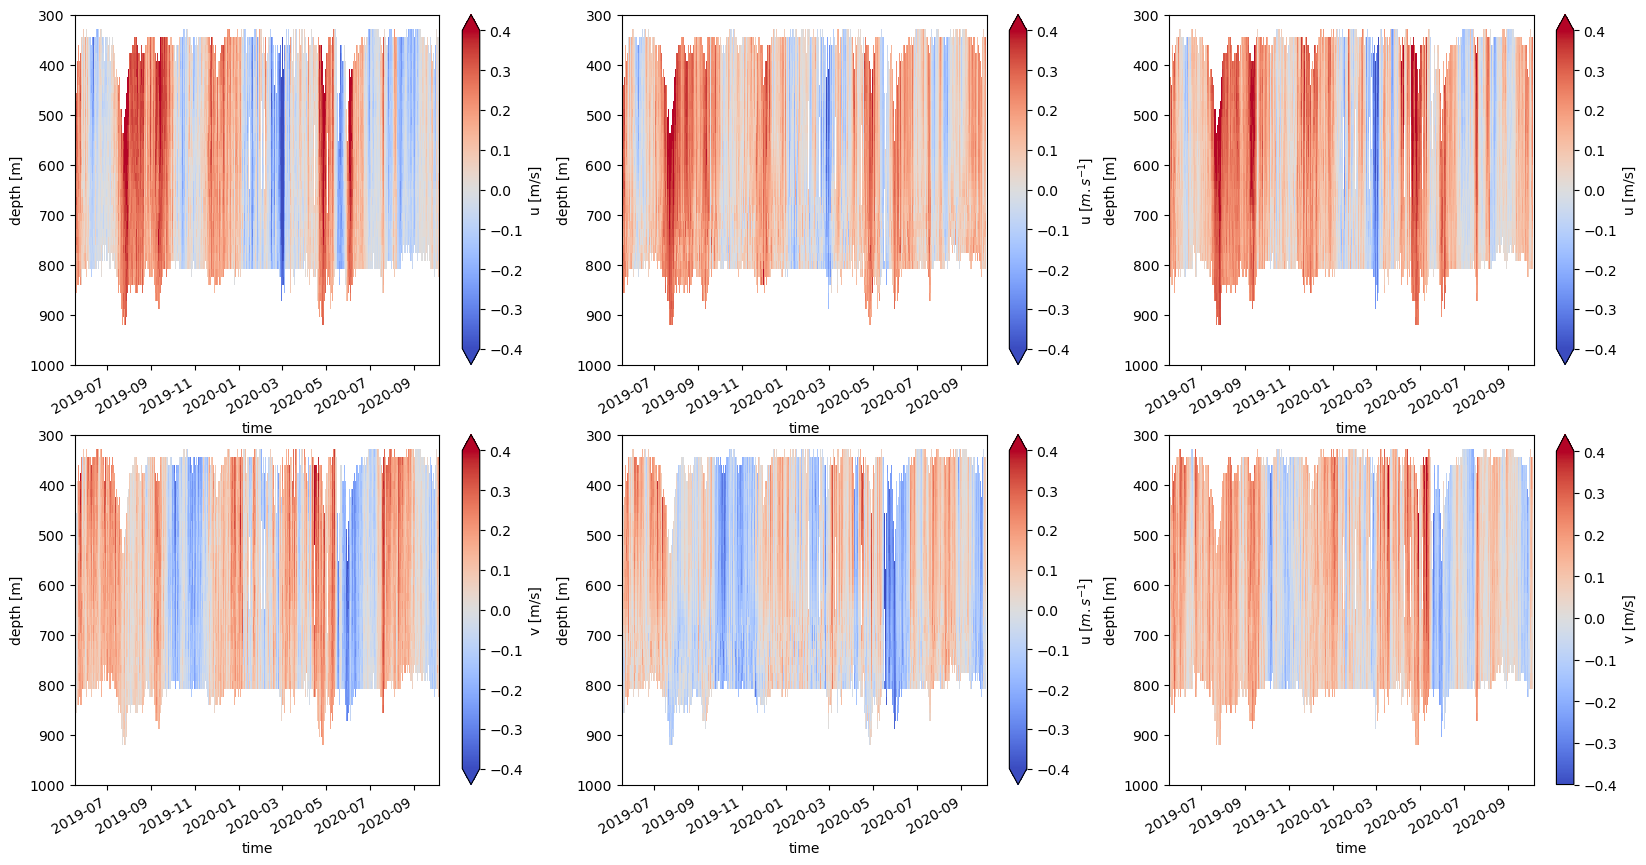

In [64]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, m in enumerate([1,2,3]):
    ax=axes[0,i]
    pl.plot_uv(moorings[str(m)],'u',fig,ax)
    ax.set_ylim(1000,300)
    ax=axes[1,i]
    pl.plot_uv(moorings[str(m)],'v',fig,ax)
    ax.set_ylim(1000,300)

In [65]:
ds

<xarray.Dataset>
Dimensions:  (time: 73057, z: 125)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-17T16:00:00 ... 2020-10-06
  * z        (z) int64 0 16 32 48 64 80 96 ... 1904 1920 1936 1952 1968 1984
Data variables:
    u        (z, time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    v        (z, time) float64 ...
    mld      (time) float64 79.88 79.86 79.84 79.83 79.81 ... nan nan nan nan
Attributes:
    orientation:      down
    magdec:           -10.992405
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    mooring:          M3
    sn:               15694
    project:          NISKINe
    Bin1Dist:         24.25
    NCells:           44
    CellSize:         16.0
    proc time:        2022-04-28T01:04:57